In [2]:
#imports

import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='D:\\projects\\Garbage Classification\\Garbage',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(512, 384),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)


Found 2527 files belonging to 6 classes.


In [4]:
class_names = dataset.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [5]:
len(dataset)

79

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 512, 384, 3)
[2 0 5 4 4 0 3 3 1 1 0 3 3 4 2 1 3 0 0 4 1 1 2 3 0 1 2 4 1 1 3 0]


In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[247.       222.       191.      ]
  [247.       222.       191.      ]
  [247.       222.       191.      ]
  ...
  [ 96.83331   75.83331   48.833313]
  [ 96.        75.        48.      ]
  [ 95.16666   74.16666   47.166656]]

 [[247.       222.       191.      ]
  [247.       222.       191.      ]
  [247.       222.       191.      ]
  ...
  [ 96.20831   75.20831   48.208313]
  [ 95.375     74.375     47.375   ]
  [ 94.54166   73.54166   46.541656]]

 [[247.375    222.375    191.375   ]
  [247.375    222.375    191.375   ]
  [247.375    222.375    191.375   ]
  ...
  [ 95.14582   74.14582   47.14582 ]
  [ 94.4375    73.4375    46.4375  ]
  [ 93.72916   72.72916   45.72916 ]]

 ...

 [[179.27083  189.27083  191.27083 ]
  [180.0625   190.0625   192.0625  ]
  [191.16667  201.16667  203.16667 ]
  ...
  [156.08327  135.08327  106.08327 ]
  [151.875    130.875    101.875   ]
  [148.70831  127.70831   98.70831 ]]

 [[193.27083  203.27083  205.27083 ]
  [195.25     205.25     207.25    ]


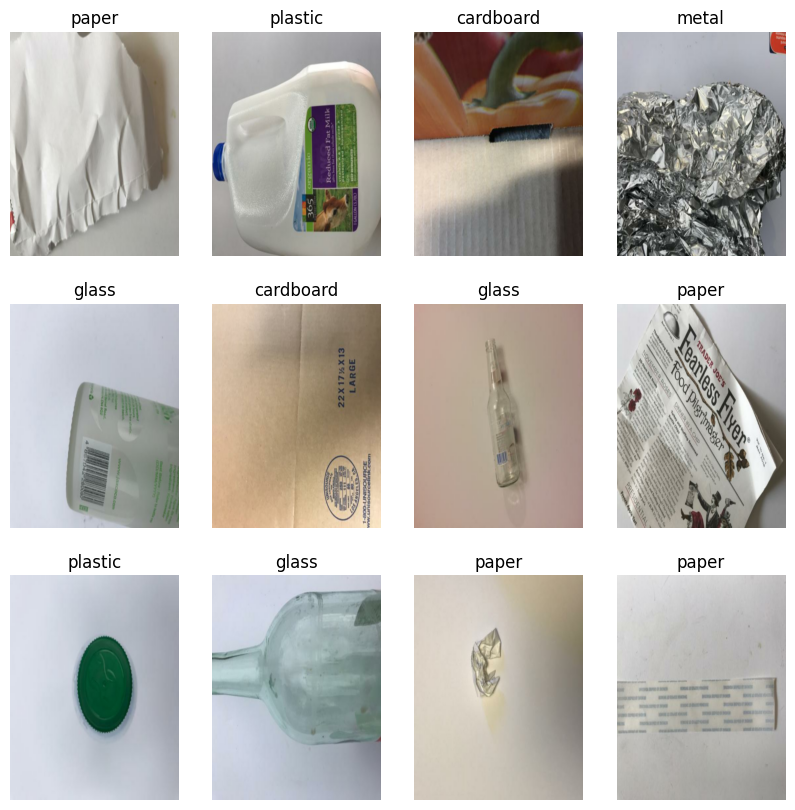

In [8]:
plt.figure(figsize=(10, 10))

for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

plt.show()

In [9]:
train_size  = 0.8
len(dataset) * train_size

63.2

In [10]:
train_ds = dataset.take(63)
len(train_ds)

63

In [11]:
test_ds = dataset.skip(63)
len(test_ds)

16

In [12]:
val_size = 0.1
len(dataset)*0.1 

7.9

In [13]:
val_ds = dataset.take(7)
len(val_ds)

7

In [14]:
test_ds = test_ds.skip(7)
len(test_ds)

9

In [15]:
def get_dataset_partitions(dataset, 
                           train_split=0.7, 
                           val_split=0.1, 
                           test_split=0.1, 
                           shuffle=True, 
                           shuffle_size=10000):

    dataset_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size)

    return train_ds, val_ds, test_ds
    

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [17]:
len(train_ds), len(val_ds), len(test_ds)

(55, 7, 17)

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = Sequential([
    layers.Resizing(512, 384),
    layers.Rescaling(1.0/255)
])

In [20]:
data_arguments = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2) 
])

In [21]:
#train model 

model = Sequential([
    resize_and_rescale,
    data_arguments,
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(512, 384)),
    layers.MaxPooling2D((2, 2))
    ])

c:\Users\Malavi\python380\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
input_shape = (32, 512, 384, 3)
n_classes = 6

model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 512, 384, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 510, 382, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 255, 191, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 253, 189, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 126, 94, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 124, 92, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 62, 46, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 60, 44, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 30, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 28, 20, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 14, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 12, 8, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 6, 4, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 1536)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 6)                │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,862 (1.01 MB)

 Trainable params: 265,862 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, 
          epochs=20, 
          batch_size=32,
          verbose=1,
          validation_data=val_ds)


Epoch 1/20


c:\Users\Malavi\python380\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


55/55 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.1989 - loss: 1.7476 - val_accuracy: 0.2679 - val_loss: 1.7323
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.2816 - loss: 1.6869 - val_accuracy: 0.3973 - val_loss: 1.4517
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.3780 - loss: 1.4973 - val_accuracy: 0.3795 - val_loss: 1.4435
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4278 - loss: 1.3832 - val_accuracy: 0.5089 - val_loss: 1.3102
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4862 - loss: 1.3315 - val_accuracy: 0.5089 - val_loss: 1.3214
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5357 - loss: 1.2360 - val_accuracy: 0.4777 - val_loss: 1.3741
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5629 - loss: 1.1338 - val_accuracy: 0.6339 - val_loss: 1.1121
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5975 - loss: 1.0334 - val_accuracy: 0.6071 - val_loss: 1.10

In [30]:
for images, labels in train_ds.take(1):
    print(set(labels.numpy()))

{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}


In [31]:
scores = model.evaluate(test_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 333ms/step - accuracy: 0.8553 - loss: 0.8756


In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

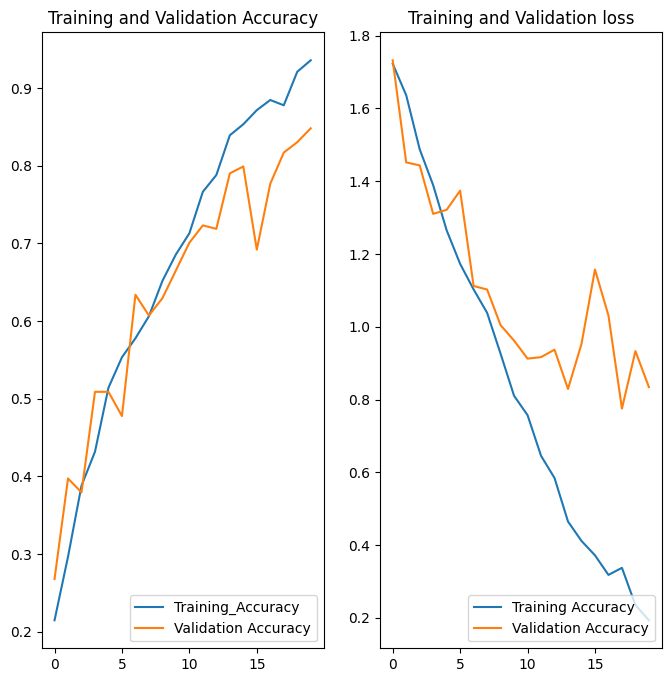

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label = 'Training_Accuracy')
plt.plot(range(20), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(20), loss, label = 'Training Accuracy')
plt.plot(range(20), val_loss, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')


first image to predict
actual label: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label -  cardboard


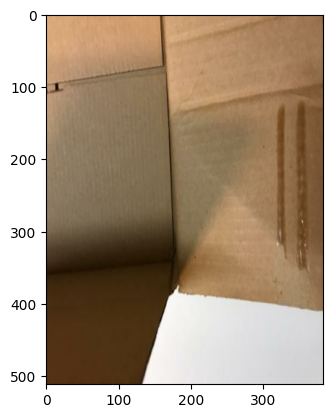

In [37]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: {}".format(class_names[first_label]))
    
    batch_prediction = model.predict(image_batch)
    print("predicted label - ",class_names[np.argmax(batch_prediction[0])])
    

In [38]:
def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(img)  
    img_array = tf.expand_dims(img_array, 0)  # add batch dimension

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])  

    predicted_class = class_names[np.argmax(score)]
    confidence = round(100 * np.max(score), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


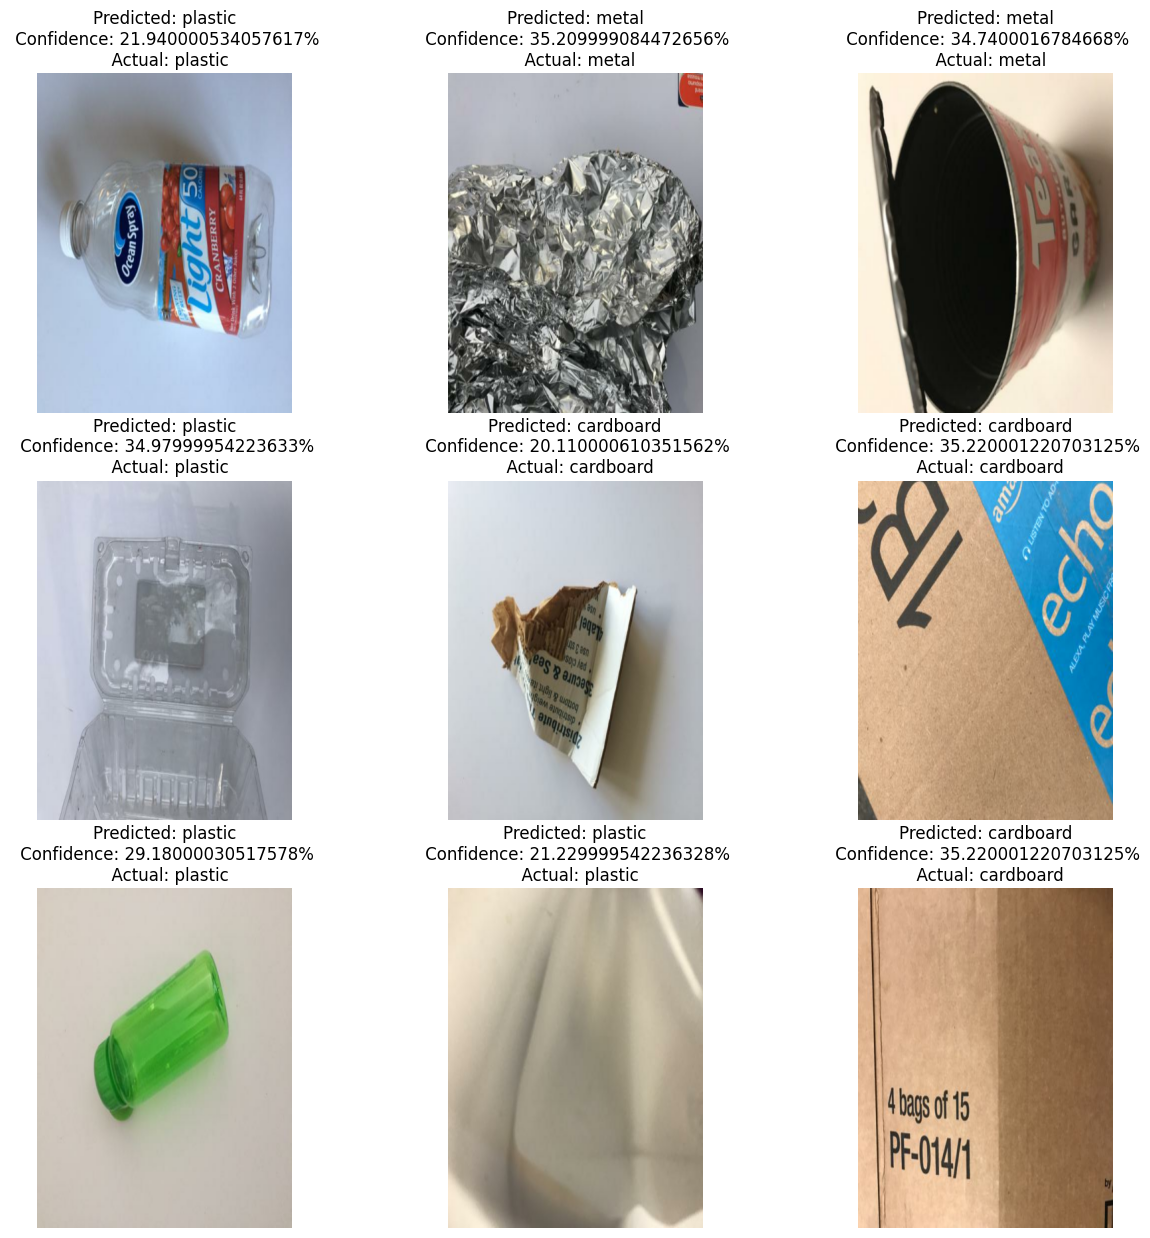

In [40]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        
        plt.title(f"Predicted: {predicted_class}\n Confidence: {confidence}%\n  Actual: {actual_class}")
        plt.axis("off")